<a href="https://colab.research.google.com/github/TejaswiKakkirala/Aerofit_threadmill-project/blob/main/Aerofit_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# To read the csv file
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
print(df.shape)
df.head()

(180, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
"""1.Import the dataset and do usual data analysis steps like checking the structure &
characteristics of the dataset"""
df.info()
print("shape of the data is",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
shape of the data is (180, 9)


In [ ]:
"""To know how many missing values present in the dataset"""
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
df_cleaned=df.drop_duplicates()
df_cleaned.shape

(180, 9)

In [ ]:
"""Therefore no duplicates is present in the dataset"""

'Therefore no duplicates is present in the dataset'

## To find the outliers in the given dataset

<Axes: ylabel='Education'>

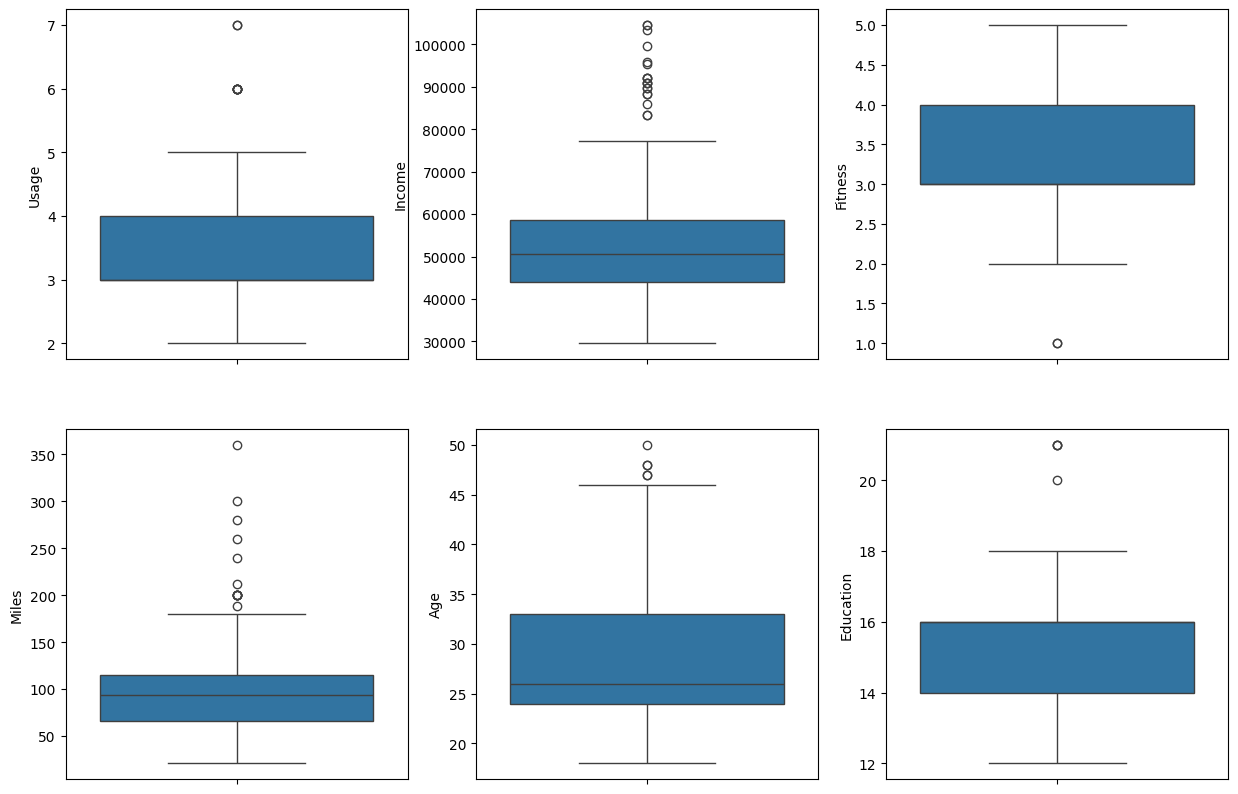

In [ ]:
""" To find the outliers for every continuous variable in the dataset"""
fig=plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(y=df['Usage'])
plt.subplot(2,3,2)
sns.boxplot(y=df['Income'])
plt.subplot(2,3,3)
sns.boxplot(y=df['Fitness'])
plt.subplot(2,3,4)
sns.boxplot(y=df['Miles'])
plt.subplot(2,3,5)
sns.boxplot(y=df['Age'])
plt.subplot(2,3,6)
sns.boxplot(y=df['Education'])

## clipping the data between the 5 percentile and 95 percentile

In [ ]:
# Calculate 5th and 95th percentiles for the 'Usage' column
usage_5th_percentile = df['Usage'].quantile(0.05)
usage_95th_percentile = df['Usage'].quantile(0.95)
# Calculate 5th and 95th percentiles for the 'Income' column
income_5th_percentile = df['Income'].quantile(0.05)
income_95th_percentile = df['Income'].quantile(0.95)
# Calculate 5th and 95th percentiles for the 'Miles' column
miles_5th_percentile = df['Miles'].quantile(0.05)
miles_95th_percentile = df['Miles'].quantile(0.95)
# Calculate 5th and 95th percentiles for the 'Fitness' column
fitness_5th_percentile = df['Fitness'].quantile(0.05)
fitness_95th_percentile = df['Fitness'].quantile(0.95)

# Clip 'Usage' column to keep only values between the 5th and 95th percentiles
df_clipped_usage = df[(df['Usage'] >= usage_5th_percentile) & (df['Usage'] <= usage_95th_percentile)]

# Clip 'Income' column to keep only values between the 5th and 95th percentiles
df_clipped_income = df[(df['Income'] >= income_5th_percentile) & (df['Income'] <= income_95th_percentile)]
# Clip 'Miles' column to keep only values between the 5th and 95th percentiles
df_clipped_miles = df[(df['Miles'] >= miles_5th_percentile) & (df['Miles'] <= miles_95th_percentile)]

# Clip 'Fitness' column to keep only values between the 5th and 95th percentiles
df_clipped_fitness = df[(df['Fitness'] >= fitness_5th_percentile) & (df['Fitness'] <= fitness_95th_percentile)]
print("Dataframe 'Useage' clipped\n",df_clipped_usage,"\nDataframe 'Income' clipped\n",df_clipped_income,"\nDataframe 'Miles' clipped\n",df_clipped_miles,"\nDataframe 'Fitness' clipped\n",df_clipped_fitness)


Dataframe 'Useage' clipped
     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     KP281   18    Male         14        Single      3        4   29562   
1     KP281   19    Male         15        Single      2        3   31836   
2     KP281   19  Female         14     Partnered      4        3   30699   
3     KP281   19    Male         12        Single      3        3   32973   
4     KP281   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
174   KP781   38    Male         18     Partnered      5        5  104581   
176   KP781   42    Male         18        Single      5        4   89641   
177   KP781   45    Male         16        Single      5        5   90886   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
0      112  
1       75  
2       

In [ ]:
cat_counts=df['Product'].value_counts()
print(cat_counts)

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


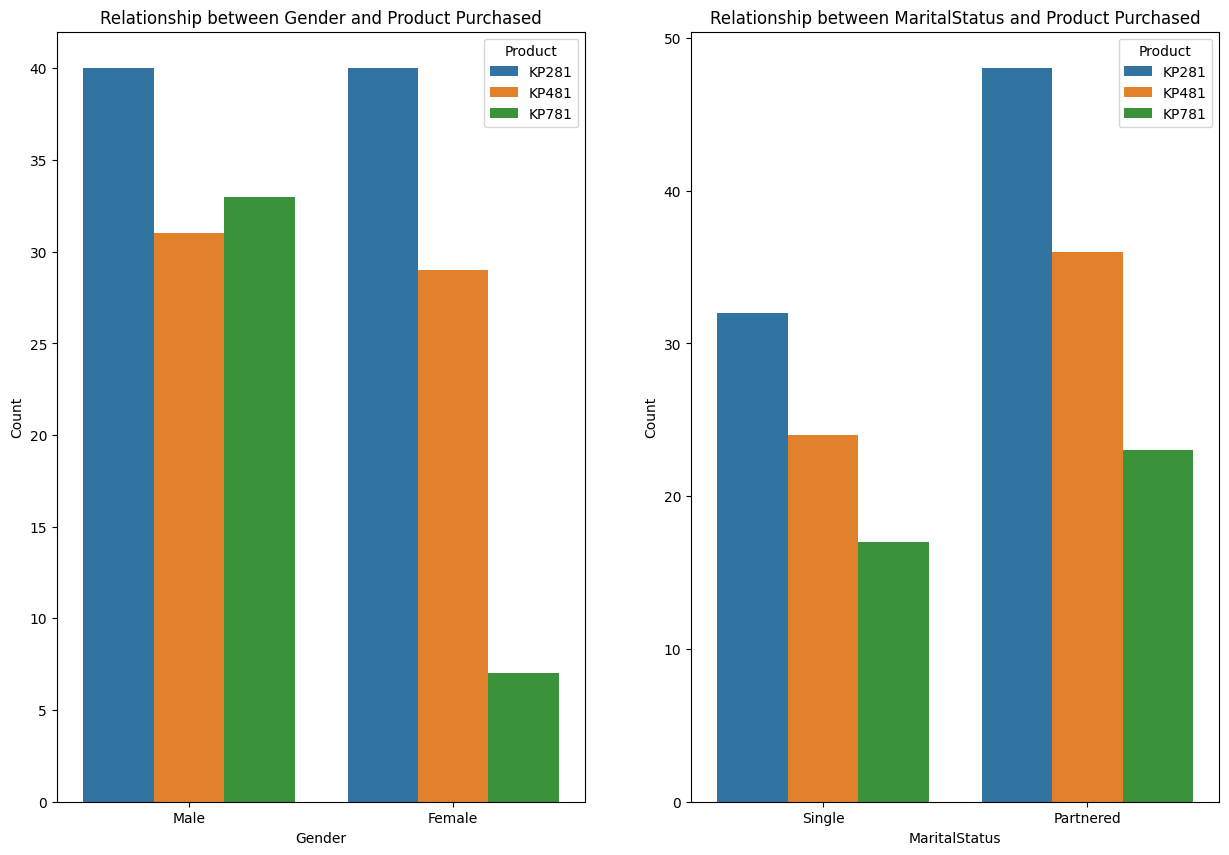

In [ ]:
fig=plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Relationship between Gender and Product Purchased')
plt.xlabel('Gender')
plt.ylabel('Count')
sns.countplot(data=df,x='Gender',hue='Product')
plt.subplot(1,2,2)
plt.title('Relationship between MaritalStatus and Product Purchased')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.show()


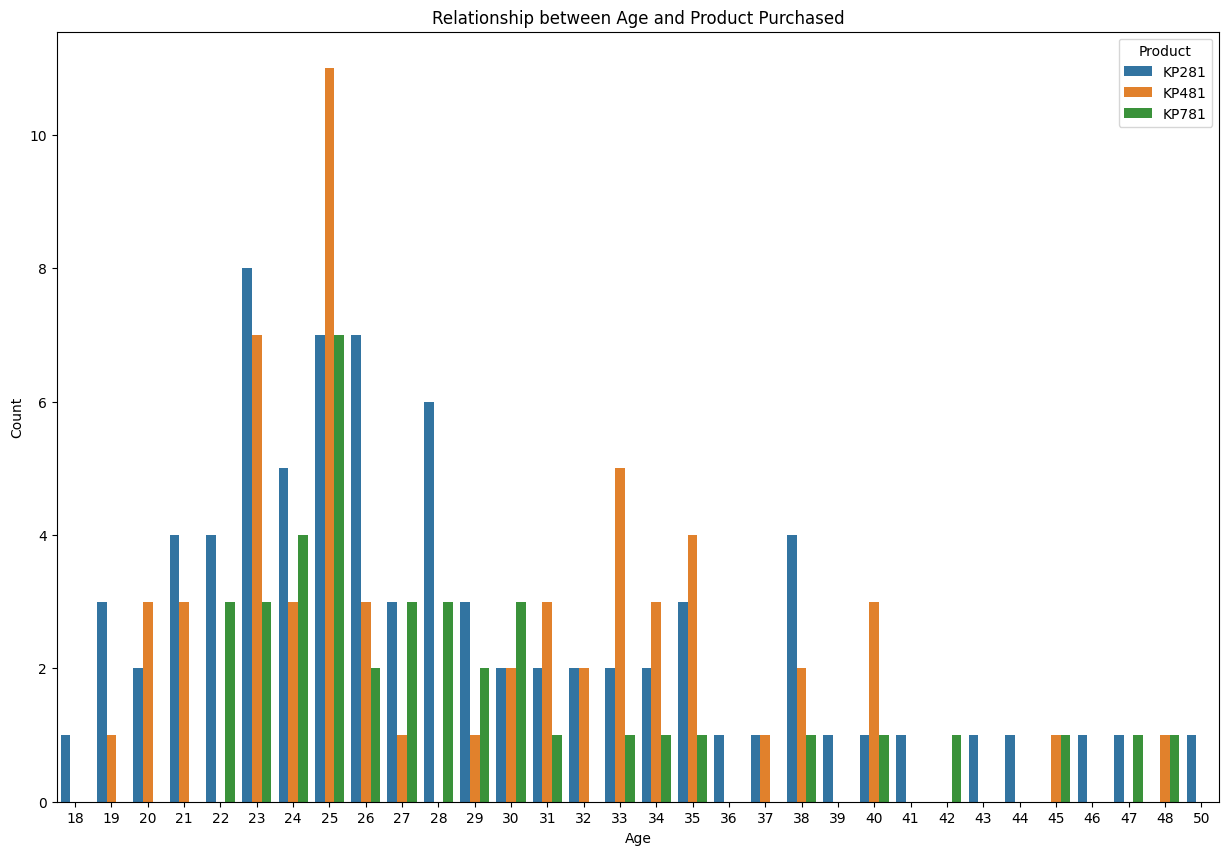

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship between Age and Product Purchased')
plt.xlabel('Age')
plt.ylabel('Count')
sns.countplot(data=df,x='Age',hue='Product')
plt.show()


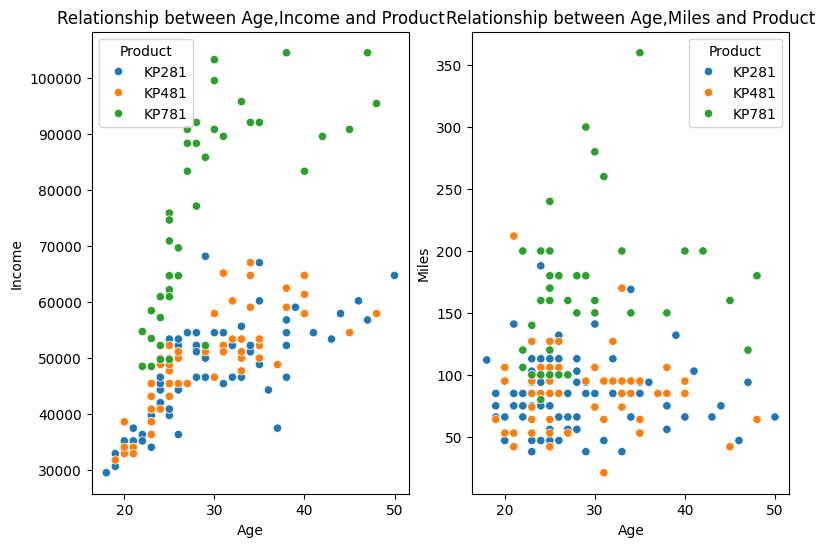

In [ ]:
fig=plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.title('Relationship between Age,Income and Product')
sns.scatterplot(data=df,x='Age',y='Income',hue='Product')
plt.subplot(1,2,2)
plt.title('Relationship between Age,Miles and Product')
sns.scatterplot(data=df,x='Age',y='Miles',hue='Product')
plt.show()

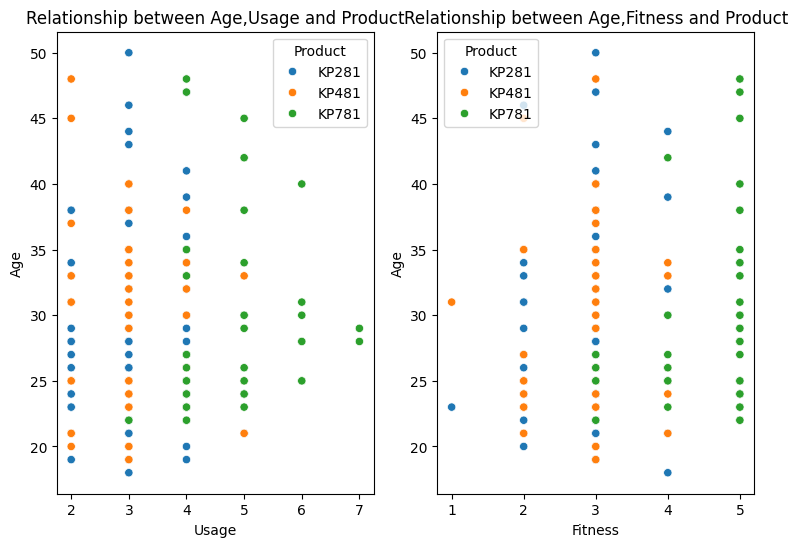

In [ ]:
fig=plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='Usage',y='Age',hue='Product')
plt.title('Relationship between Age,Usage and Product')
plt.subplot(1,2,2)
sns.scatterplot(data=df,x='Fitness',y='Age',hue='Product')
plt.title('Relationship between Age,Fitness and Product')
plt.show()

In [ ]:
"""Find the marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)"""
crosstab = pd.crosstab(index=df['Product'], columns='count')

# Calculate the total number of observations
total = crosstab.sum().sum()

# Calculate the marginal probability for each product
marginal_probabilities = crosstab / total

print(marginal_probabilities)

col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


In [ ]:
crosstab = pd.crosstab(index=df['Gender'], columns=df['Product'])

# Calculate the total number of observations
total = crosstab.sum().sum()

# Calculate the marginal probability for each product
marginal_probabilities = crosstab / total

print("Probability of customers to buy a product based on gender:\n",marginal_probabilities)

Probability of customers to buy a product based on gender:
 Product     KP281     KP481     KP781
Gender                               
Female   0.222222  0.161111  0.038889
Male     0.222222  0.172222  0.183333


In [ ]:
crosstab = pd.crosstab(index=df['MaritalStatus'], columns=df['Product'])

# Calculate the total number of observations
total = crosstab.sum().sum()

# Calculate the marginal probability for each product
marginal_probabilities = crosstab / total

print("Probability of customers to buy a product based on MaritalStatus:\n",marginal_probabilities)

Probability of customers to buy a product based on MaritalStatus:
 Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.266667  0.200000  0.127778
Single         0.177778  0.133333  0.094444


In [ ]:
# Total count of customers by gender
gender_counts = df['Gender'].value_counts()

# Count of female customers
female_count = gender_counts['Female']

# Count of female customers who bought the product KP281
female_buys_count = df[(df['Gender'] == 'Female') & (df['Product'] == 'KP281')].shape[0]

# Probability that a female customer buys the product
probability_female_buys = female_buys_count / female_count

print(f"Probability that a female customer buys the product KP281 is(F|KP281): {probability_female_buys:.2f}")
print(f"Probability that a male customer buys the product KP281 is(M|KP281):{1-probability_female_buys:.2f}")
# Count of female customers who bought the product KP481
female_KP481_count = df[(df['Gender'] == 'Female') & (df['Product'] == 'KP481')].shape[0]

# Probability that a female customer buys the product
probability_female_KP481 = female_KP481_count / female_count

print(f"Probability that a female customer buys the product KP481 is(F|KP481): {probability_female_KP481:.2f}")
print(f"Probability that a male customer buys the product KP481 is(M|KP481):{1-probability_female_KP481:.2f}")
# Count of female customers who bought the product KP781
female_KP781_count = df[(df['Gender'] == 'Female') & (df['Product'] == 'KP781')].shape[0]

# Probability that a female customer buys the product
probability_female_KP781 = female_KP781_count / female_count

print(f"Probability that a female customer buys the product KP781 is(F|KP781): {probability_female_KP781:.2f}")
print(f"Probability that a male customer buys the product KP781 is(M|KP781):{1-probability_female_KP781:.2f}")


Probability that a female customer buys the product KP281 is(F|KP281): 0.53
Probability that a male customer buys the product KP281 is(M|KP281):0.47
Probability that a female customer buys the product KP481 is(F|KP481): 0.38
Probability that a male customer buys the product KP481 is(M|KP481):0.62
Probability that a female customer buys the product KP781 is(F|KP781): 0.09
Probability that a male customer buys the product KP781 is(M|KP781):0.91


##To check the correlation among different factors

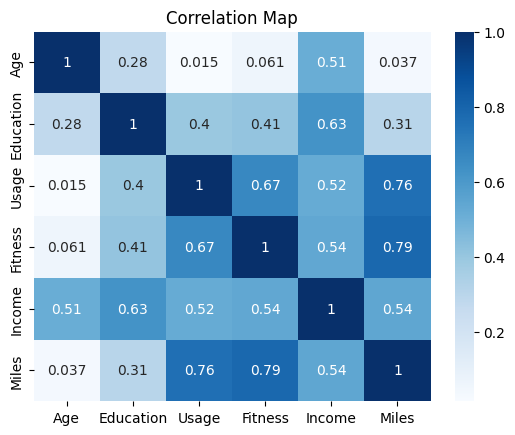

In [ ]:
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True)
plt.title("Correlation Map")
plt.show()

In [ ]:
filtered_df = df[df['Product'] == 'KP281']

# Analyze age, gender, and income group
age_distribution = filtered_df['Age'].describe()
gender_distribution = filtered_df['Gender'].value_counts()
Income_distribution = filtered_df['Income'].describe()
educational_dis=filtered_df['Education'].value_counts()
usage_dis=filtered_df['Usage'].value_counts()
fitness_dis=filtered_df['Fitness'].value_counts()
miles_dis=filtered_df['Miles'].value_counts()
maritalstaus_dis=filtered_df['MaritalStatus'].value_counts()
# Print results
print("Age Distribution:\n",age_distribution)
print("\n Gender Distribution:\n",gender_distribution)
print("\n Income Distribution:\n",Income_distribution)
print("\n Education Distribution:\n",educational_dis)
print("\n Usage Distribution:\n",usage_dis)
print("\n Fitness Distribution:\n",fitness_dis)
print("\n Miles Distribution:\n",miles_dis)
print("\n MaritalStatus Distribution:\n",maritalstaus_dis)

Age Distribution:
 count    80.000000
mean     28.550000
std       7.221452
min      18.000000
25%      23.000000
50%      26.000000
75%      33.000000
max      50.000000
Name: Age, dtype: float64

 Gender Distribution:
 Gender
Male      40
Female    40
Name: count, dtype: int64

 Income Distribution:
 count       80.00000
mean     46418.02500
std       9075.78319
min      29562.00000
25%      38658.00000
50%      46617.00000
75%      53439.00000
max      68220.00000
Name: Income, dtype: float64

 Education Distribution:
 Education
16    39
14    30
15     4
13     3
12     2
18     2
Name: count, dtype: int64

 Usage Distribution:
 Usage
3    37
4    22
2    19
5     2
Name: count, dtype: int64

 Fitness Distribution:
 Fitness
3    54
2    14
4     9
5     2
1     1
Name: count, dtype: int64

 Miles Distribution:
 Miles
85     16
75     10
66     10
47      9
94      8
113     8
56      6
103     3
38      3
141     2
132     2
112     1
188     1
169     1
Name: count, dtype: int64



In [ ]:
filtered_df = df[df['Product'] == 'KP481']

# Analyze age, gender, and income group
age_distribution = filtered_df['Age'].describe()
gender_distribution = filtered_df['Gender'].value_counts()
Income_distribution = filtered_df['Income'].describe()
educational_dis=filtered_df['Education'].value_counts()
usage_dis=filtered_df['Usage'].value_counts()
fitness_dis=filtered_df['Fitness'].value_counts()
miles_dis=filtered_df['Miles'].value_counts()
maritalstaus_dis=filtered_df['MaritalStatus'].value_counts()
# Print results
print("Age Distribution:\n",age_distribution)
print("\n Gender Distribution:\n",gender_distribution)
print("\n Income Distribution:\n",Income_distribution)
print("\n Education Distribution:\n",educational_dis)
print("\n Usage Distribution:\n",usage_dis)
print("\n Fitness Distribution:\n",fitness_dis)
print("\n Miles Distribution:\n",miles_dis)
print("\n MaritalStatus Distribution:\n",maritalstaus_dis)

Age Distribution:
 count    60.000000
mean     28.900000
std       6.645248
min      19.000000
25%      24.000000
50%      26.000000
75%      33.250000
max      48.000000
Name: Age, dtype: float64

 Gender Distribution:
 Gender
Male      31
Female    29
Name: count, dtype: int64

 Income Distribution:
 count       60.000000
mean     48973.650000
std       8653.989388
min      31836.000000
25%      44911.500000
50%      49459.500000
75%      53439.000000
max      67083.000000
Name: Income, dtype: float64

 Education Distribution:
 Education
16    31
14    23
13     2
18     2
12     1
15     1
Name: count, dtype: int64

 Usage Distribution:
 Usage
3    31
2    14
4    12
5     3
Name: count, dtype: int64

 Fitness Distribution:
 Fitness
3    39
2    12
4     8
1     1
Name: count, dtype: int64

 Miles Distribution:
 Miles
95     12
85     11
106     8
53      7
64      6
127     5
42      4
74      3
170     2
212     1
21      1
Name: count, dtype: int64

 MaritalStatus Distribution:
 

In [ ]:
filtered_df = df[df['Product'] == 'KP781']

# Analyze age, gender, and income group
age_distribution = filtered_df['Age'].describe()
gender_distribution = filtered_df['Gender'].value_counts()
Income_distribution = filtered_df['Income'].describe()
educational_dis=filtered_df['Education'].value_counts()
usage_dis=filtered_df['Usage'].value_counts()
fitness_dis=filtered_df['Fitness'].value_counts()
miles_dis=filtered_df['Miles'].value_counts()
maritalstaus_dis=filtered_df['MaritalStatus'].value_counts()
# Print results
print("Age Distribution:\n",age_distribution)
print("\n Gender Distribution:\n",gender_distribution)
print("\n Income Distribution:\n",Income_distribution)
print("\n Education Distribution:\n",educational_dis)
print("\n Usage Distribution:\n",usage_dis)
print("\n Fitness Distribution:\n",fitness_dis)
print("\n Miles Distribution:\n",miles_dis)
print("\n MaritalStatus Distribution:\n",maritalstaus_dis)

Age Distribution:
 count    40.000000
mean     29.100000
std       6.971738
min      22.000000
25%      24.750000
50%      27.000000
75%      30.250000
max      48.000000
Name: Age, dtype: float64

 Gender Distribution:
 Gender
Male      33
Female     7
Name: count, dtype: int64

 Income Distribution:
 count        40.00000
mean      75441.57500
std       18505.83672
min       48556.00000
25%       58204.75000
50%       76568.50000
75%       90886.00000
max      104581.00000
Name: Income, dtype: float64

 Education Distribution:
 Education
18    19
16    15
21     3
14     2
20     1
Name: count, dtype: int64

 Usage Distribution:
 Usage
4    18
5    12
6     7
7     2
3     1
Name: count, dtype: int64

 Fitness Distribution:
 Fitness
5    29
4     7
3     4
Name: count, dtype: int64

 Miles Distribution:
 Miles
100    7
200    6
180    6
160    5
150    4
120    3
106    1
140    1
80     1
240    1
170    1
300    1
280    1
260    1
360    1
Name: count, dtype: int64

 MaritalStatus

## **Detailed Analysis :**


Firstly I imported the Libraries that are usefull to me that is Numpy,Pandas,Matplotlib.pyplot,Seaborn. To read the Csv file of Aerofit Dataset i implemented the function of pd.read_csv(file location).The shape of the Aerofit Dataset is 180,9.In the Dataset of Aerofit there are columns of objects like Product,Gender,Marital Status,integers like Age,Education,Usage,Fitness,Income,Miles. By using function isna.sum() i found that  there is no nulls in the dataset.

To found  the outliers present in the dataset I used box plot ,there is more number of outliers is income and miles, fitness have only one outlier is present. i did a clip function between 5th percentile and 95th percentile by using quantile function to calculate the percentile values. By clipping the data, outliers present in the dataset is removed .

I count the products to know the number of products sold.In that the Product KP281 is 80,Kp481 is 60,Kp781 is 40.The Highest sales of Product is KP281. To find the Relationship between the Product & Marital Status, Gender & Product, Product & Age, I used countplot function. By the countplot of Product and Gender I have observed that KP281 has equal sales among male and female,KP481 as compared to female has more sales for male  ,KP781 has more sales for male compared to female. By the countplot of Product and Marital Status I have observed that KP281,KP481,KP781 has more number of sales for Partnered than singles. By the countplot of Product and Age I have observed that KP281 has highest sales age is 23,KP481 has highest sales age is 25,KP781 has highest sales age is 25.

To find the Relationship between the 2-numerical and 1- catagorical values like Age,Product & Income, Age,Miles & Product, Age,Usage & Product ,Age,Fitness & Product, I used scatterplot function.By this I observe that Product,Age,Income & Product,Miles,Age  plots show that the products (KP281, KP481, KP781) are distributed across different income levels and miles, with no single product dominating any particular range. The Age,Usage & Product ,Age,Fitness & Product  plots suggest that these three products are used relatively evenly across a wide age range, with no significant preference or trend related to age.

To find the probablity of a product  purchased i used the pd.crosstab() function,by this I found that KP281,KP481,KP781 is 44%,33%,22% respectively. I  found that the probability of  product purchased based on the gender is for KP281 male and female probability is same as 22%, for KP481 male probability is 17.2% and female probability is 16.1%,for KP781 male probability is 3.89% and female probability is 18.3%.The Conditional probability that a female customer buys the product KP281 (F|KP281) is 0.53,(M|KP281) is 0.47, (F|KP481) is 0.38,(M|KP481) is 0.62, (F|KP781) is 0.09,(M|KP781) is 0.91.

The heatmap shows the corre;ation between the columns present in dataset,Age and Income,Miles and Usage,Education and Income,Fitness and Miles.
For the Product KP281 purchased by the customers with a Mean Age of 28.5 years, most of the Marital Status is Partnered, Gender both Female and Male are equal, Mean Income is 46418.03,most of the Education is 19, most of the Usage is 3, most of the Fitness is 3, most of the Miles is 85.

For the Product KP481 purchased by the customers with a Mean Age of 28.9 years, most of the Marital Status is Partnered, Gender Male purchased more then Female, Mean Income is 48973.65,most of the Education is 16, most of the Usage is 3, most of the Fitness is 3, most of the Miles is 95.
For the Product KP781 purchased by the customers with a Mean Age of 29.1 years, most of the Marital Status is Partnered, Gender Male purchased more then Female, Mean Income is 75441.58,most of the Education is 18, most of the Usage is 4, most of the Fitness is 5, most of the Miles is 100.

# **Conclusion:**

Finally the Analisation of Aerofit Businesscase is, among the products KP281,KP481,KP781 the most selling product is KP281 purchased by the customers most of them are with an Age of 23 years, Marital Status is Partnered, Gender both Female and Male are equal,Mean Income is 46418.03,Education is 19,Usage is 3, Fitness is 3, Miles is 85.





## Thank you
